In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from yellowbrick.features import Rank2D
from sklearn.model_selection import train_test_split
import seaborn as sns
from nltk.tokenize import sent_tokenize

# read data (replace with your own path)
df = pd.read_csv('winequality-red.csv', sep=';',index_col=None,na_values='?')
print(df.describe())
from sklearn.preprocessing import OneHotEncoder

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

C:\Users\Yooru\Anaconda3\lib\site-packages\yellowbrick\features\rankd.py:216: YellowbrickWarning: RankD plots may be clipped when using matplotlib v3.1.1, upgrade to matplotlib v3.1.2 or later to fix the plots.
  warnings.warn(msg, YellowbrickWarning)


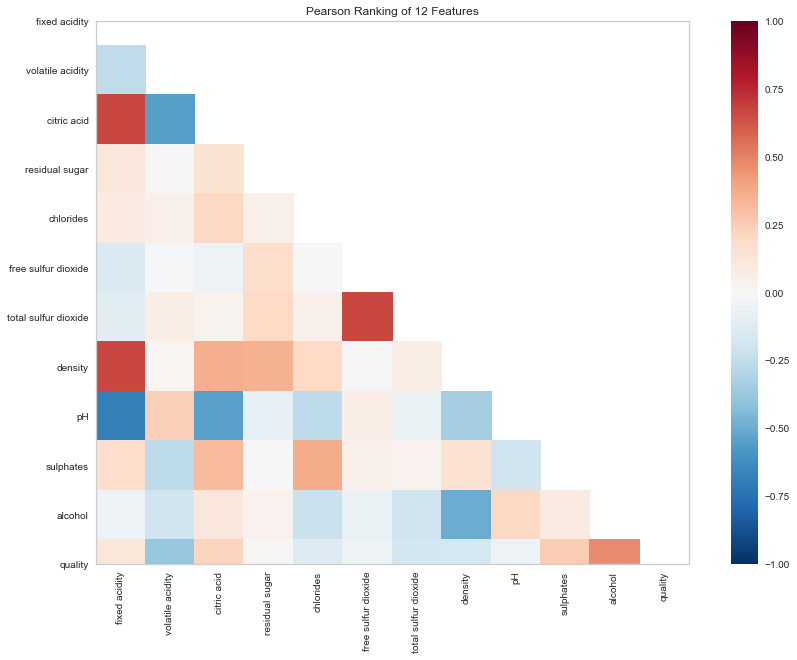

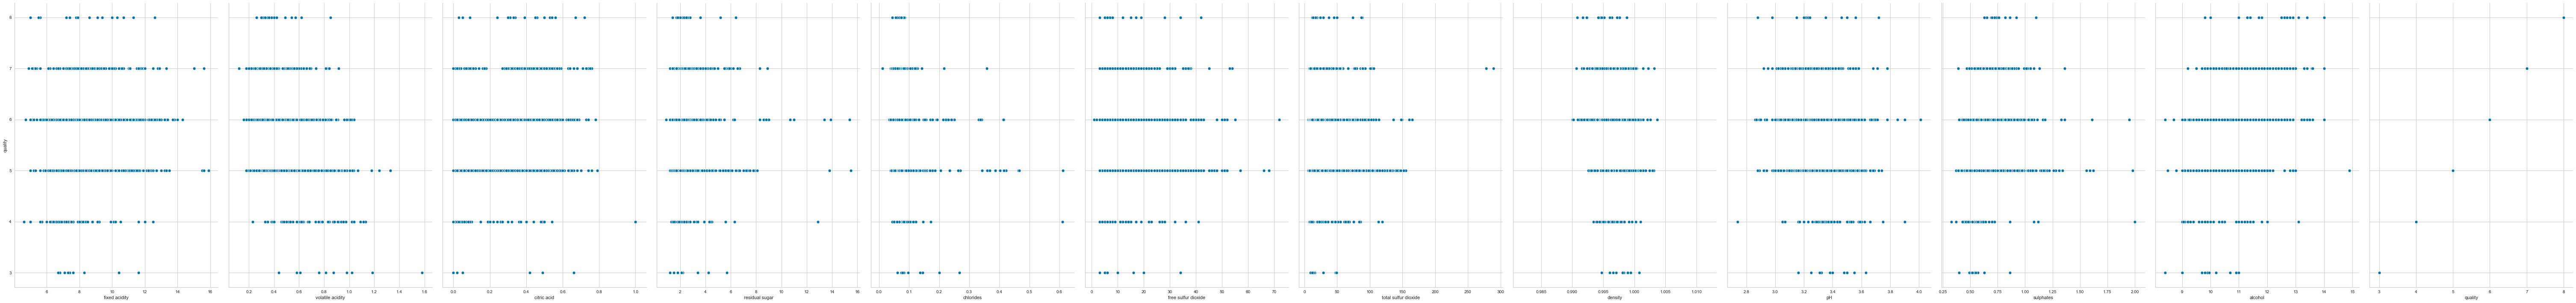

In [2]:
def pearsonCor(data):
    visualizer = Rank2D(algorithm="pearson",size=(1080, 720))
    visualizer.fit_transform(data)# or df_scaled
    visualizer.show()
    
    
def scatPlot(data):
    # visualize the relationship between the features and the response using scatterplots
    sns.pairplot(data, x_vars=data.columns, y_vars='quality', height=10, aspect=0.7)


pearsonCor(df)
scatPlot(df)
#print(df)
#print(df.head(10))

In [3]:
#df=df.drop(['pH'],axis=1)
#df=df.drop(['residual sugar'],axis=1)


from sklearn.model_selection import train_test_split
# split into explanatory and response variables 

scaler = StandardScaler()
#df = scaler.fit_transform(df)
df2=pd.DataFrame(scaler.fit_transform(df))
names = df.iloc[:,0:10].columns.get_values()
print(names)
X = df2.iloc[:,0:10]
Y = df2.iloc[:,10]
print(X)
print(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=7)

def function(X,Y):
    
    # build and fit model
    reg = linear_model.LinearRegression()
    reg.fit(X_train,Y_train)

    # output model
    print("Coefficients:" ,reg.coef_)
    print("Intercept:", reg.intercept_)

    # compute predicted values
    Y_pred = reg.predict(X_test)

    # compute error statistics
    mse = mean_squared_error(Y_test, Y_pred)
    r2s = r2_score(Y_test, Y_pred) 
    print("MSE = ", mse)
    print("R2s = ", r2s)
    return reg.coef_

['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates']
             0         1         2         3         4         5         6  \
0    -0.528360  0.961877 -1.391472 -0.453218 -0.243707 -0.466193 -0.379133   
1    -0.298547  1.967442 -1.391472  0.043416  0.223875  0.872638  0.624363   
2    -0.298547  1.297065 -1.186070 -0.169427  0.096353 -0.083669  0.229047   
3     1.654856 -1.384443  1.484154 -0.453218 -0.264960  0.107592  0.411500   
4    -0.528360  0.961877 -1.391472 -0.453218 -0.243707 -0.466193 -0.379133   
...        ...       ...       ...       ...       ...       ...       ...   
1594 -1.217796  0.403229 -0.980669 -0.382271  0.053845  1.542054 -0.075043   
1595 -1.390155  0.123905 -0.877968 -0.240375 -0.541259  2.211469  0.137820   
1596 -1.160343 -0.099554 -0.723916 -0.169427 -0.243707  1.255161 -0.196679   
1597 -1.390155  0.654620 -0.775267 -0.382271 -0.264960  1.542054 -

C:\Users\Yooru\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  # This is added back by InteractiveShellApp.init_path()


In [4]:
coef1 = function(X_train,Y_train)

Coefficients: [ 0.91098192  0.0799012   0.14998612  0.38533363 -0.0829975  -0.0119895
 -0.06532311 -1.1146272   0.56954989  0.21447338]
Intercept: -0.0023748717886455904
MSE =  0.3455352190951169
R2s =  0.6415062739483126


In [5]:
# standarise variables and rerun MLR analysis to
# estimate variable importance.
#scaler = StandardScaler()
dfn = pd.DataFrame(scaler.fit_transform(df))
#X = df.iloc[:,1:11]
#Y = df.iloc[:,11]
coef = function(X,Y)

Coefficients: [ 0.91098192  0.0799012   0.14998612  0.38533363 -0.0829975  -0.0119895
 -0.06532311 -1.1146272   0.56954989  0.21447338]
Intercept: -0.0023748717886455904
MSE =  0.3455352190951169
R2s =  0.6415062739483126


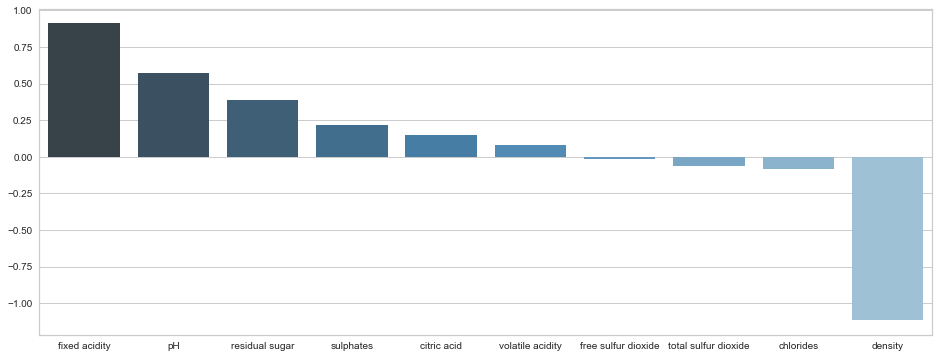

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

#dfn = df.drop(["quality"],axis = 1)
#names = X.columns.get_values()

coef2 = pd.DataFrame(coef.reshape(1,10))#coef2.columns=names
coef2.columns=names
coef2 = coef2
coef2=coef2.sort_values(by=0, ascending=False, axis=1)
plt.figure(figsize=(16, 6))
ax = sns.barplot(data=coef2,palette="Blues_d")